In [110]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

seaborn.set()

CARS = [
    "ford",
    "bmw",
    "fiat",
    "toyota",
    "peugeot",
    "audi",
    "mercedes",
    "volvo",
    "nissan",
    "suzuki",
    "volkswagen",
    "renault",
    "skoda",
    "opel"
]

cars = pd.read_csv("cars_year_price.csv", sep=";")
cars.head(20)

,car,year,mean_price
0,ford,1995.0,653.67
1,ford,2002.0,1167.04
2,ford,2005.0,2311.19
3,ford,2006.0,3688.57
4,ford,2007.0,3478.46
5,ford,2009.0,6896.86
6,ford,2010.0,6307.88
7,ford,2011.0,6980.27
8,ford,2013.0,4552.35
9,ford,2014.0,8964.63


In [158]:
cars_tab = []

for car in CARS:
    cars_y, cars_p = [], []
    for i, data in cars.iterrows():
        if str(car) in data['car']:
            cars_y.append(data['year'])
            cars_p.append(data['mean_price'])
    df = pd.DataFrame({"year":cars_y, "price":cars_p})
    cars_tab.append(df)

Predicted value for:  FORD : 12    18466.21
Name: price, dtype: float64


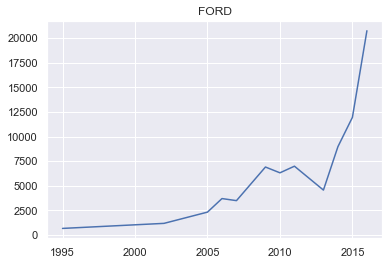

In [161]:
i = 0
for car_data in cars_tab[:1]:
    last = car_data.tail(1)
    print("Predicted value for: ", CARS[i].upper(), ":", last['price'])
    car_data.drop(last.index, inplace=True)

    plt.plot('year', 'price', data=car_data)
    plt.title(CARS[i].upper())
    i += 1
    plt.show()

In [193]:
new_db = cars.pivot(index="car", columns='year', values='mean_price')
new_db

year,1995.0,1996.0,1997.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
car,,,,,,,,,,,,,,,,,,,,,
audi,NaN,3711.92,NaN,NaN,2101.09,NaN,3268.12,4412.28,3455.12,4038.75,...,NaN,12583.17,12746.58,17380.64,NaN,21582.82,35780.71,25913.39,50884.40,101996.03
bmw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10559.90,13213.44,15540.25,18652.97,16894.89,22139.14,NaN,38356.41,NaN,NaN
fiat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1143.92,1610.83,...,3256.68,NaN,35018.09,NaN,10505.43,9221.43,8902.38,8443.80,14471.76,NaN
ford,653.67,NaN,NaN,NaN,NaN,NaN,1167.04,NaN,NaN,2311.19,...,6980.27,NaN,4552.35,8964.63,11946.89,20754.06,18466.21,15828.18,NaN,NaN
nissan,NaN,NaN,NaN,NaN,NaN,700.13,NaN,1354.03,NaN,NaN,...,8847.90,5310.96,NaN,11672.46,6513.37,13306.88,23322.05,18186.06,23836.96,19592.62
opel,NaN,NaN,NaN,NaN,700.13,NaN,NaN,897.64,2544.65,2054.39,...,5591.22,7003.62,5813.00,7275.98,7937.32,5649.24,16784.41,16038.29,NaN,27598.93
peugeot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.92,...,5811.21,7532.78,7725.23,NaN,8499.75,10079.37,NaN,13050.08,NaN,NaN
renault,NaN,NaN,630.33,NaN,NaN,NaN,NaN,1885.14,1999.92,2077.74,...,3548.50,NaN,7085.33,8042.49,8789.54,10030.58,12548.15,12349.71,12979.96,NaN
skoda,NaN,NaN,NaN,NaN,NaN,NaN,2567.99,NaN,NaN,1284.00,...,5065.95,NaN,6746.82,7688.34,7073.66,9081.36,16551.89,12816.62,26644.33,21447.75


In [293]:
# df = new_db
# df1 = pd.concat([df.ffill(), df.bfill()]).groupby(level=0).mean()
# df1

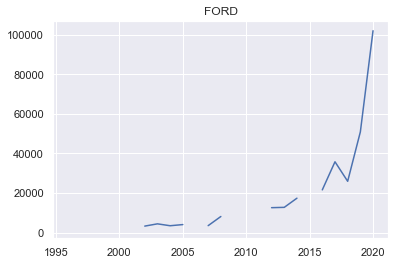

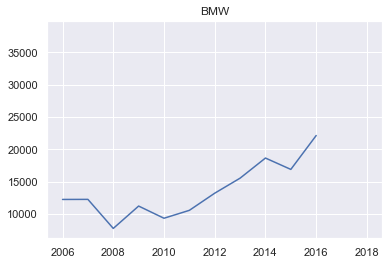

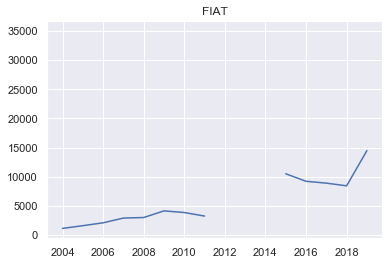

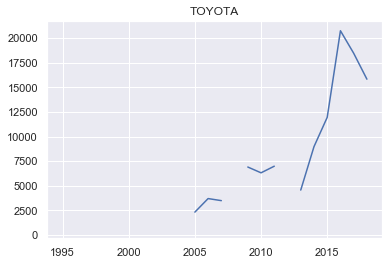

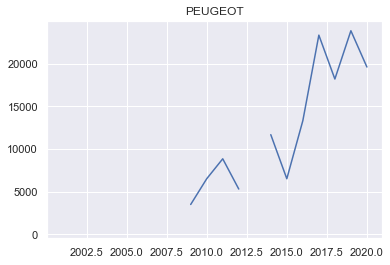

In [234]:
# graphs with missing data
for i in range(5):
    plt.plot(new_db.columns, new_db.values[i])
    plt.title(CARS[i].upper())
    plt.show()

In [272]:
new_db.iloc[0].last_valid_index()

2020.0

In [274]:
new_db.iloc[0]

year
1995.0          NaN
1996.0      3711.92
1997.0          NaN
1999.0          NaN
2000.0      2101.09
2001.0          NaN
2002.0      3268.12
2003.0      4412.28
2004.0      3455.12
2005.0      4038.75
2006.0          NaN
2007.0      3501.58
2008.0      8124.20
2009.0          NaN
2010.0      8380.53
2011.0          NaN
2012.0     12583.17
2013.0     12746.58
2014.0     17380.64
2015.0          NaN
2016.0     21582.82
2017.0     35780.71
2018.0     25913.39
2019.0     50884.40
2020.0    101996.03
Name: audi, dtype: float64

In [300]:
for i, d in new_db[:1].iterrows():
#     print(np.isnan(d))
    f = d.first_valid_index()
    l = d.last_valid_index()
    print(f, l)

1996.0 2020.0
